In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib as mpl

- given 2 points, plot a line between them: $plot\_from\_point(P0, P1,ub,lb, use\_inbuilt = False)$
- find intersection pt of 2 lines: $intersect(L1, L2, verbose = True)$
- plot a single line using ax + by = c: $plot\_lines(a,b,c,x)$
- plot multiple lines of the form a1x + b1y = c1: $plot\_(lines,ub=-5,lb=5)$
- visualise feasible region given set of inequalities: $plot\_colour(lines,signs,ub=-5,lb=5)$
- 3D visualisation example

In [4]:
def plot_from_point(P0, P1,ub,lb, use_inbuilt = False):
    x = np.array(range(ub,lb))
    fig, ax = plt.subplots(figsize=(8,6))
    plt.axis([ub, lb, ub, lb])
    x1, y1 = P0
    x2, y2 = P1
    

    num = y2 - y1
    den = x2 - x1
    if num == 0:
        y = y1


    elif den == 0:
        x = x1

    else:
        slope = num/den
        y = slope * (x - x1) + y1
    
    if not use_inbuilt:
        ax.plot(x,y)
    else:
        ax.plot([x1,x2], [y1,y2])
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(linestyle='-')
    
    print('slope: ',slope)
    x2 = 1
    x1 = -slope
    c = -slope*x1+y1
    print(f'eqn: {x1}*x1 + {x2}*x2 = {c}')


slope:  0.5
eqn: -0.5*x1 + 1*x2 = 2.25


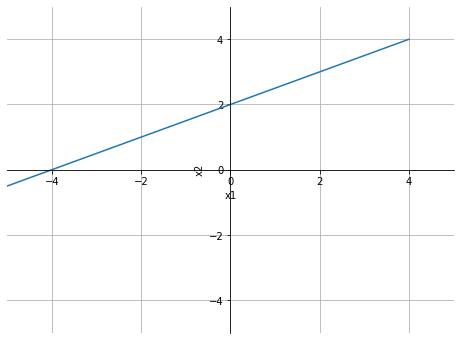

In [5]:
plot_from_point((0,2),(4,4),-5,5)

slope:  1.0
eqn: -1.0*x1 + 1*x2 = 2.0


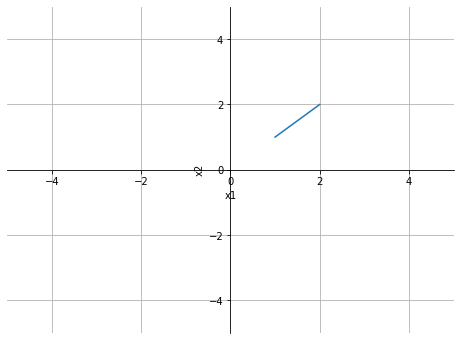

In [6]:
plot_from_point((1,1),(2,2),-5,5, use_inbuilt=True)

In [7]:
def intersect(L1, L2, verbose = True): # L1 coefficients of ax + by = c as a tuple (a,b,c)
    flag = [False]*2
    A1,B1,C1 = L1 #A1x + B1y = C1, A2x + B2y = C2
    A2,B2,C2 = L2
    
    if verbose:
        print('line 1: %f x + %f y = %f'%(A1,B1,C1))
        print('line 2: %f x + %f y = %f'%(A2,B2,C2))
    
    
    det = A1*B2 - A2*B1
    if det==0: #parallel lines, no intersection point
        return -1,-1,-1
    else:
        x = (B2*C1 - B1*C2)/det
        if not x.is_integer():
            x1 = format(x, '.2f') #limit decimal to 2 places
            flag[0] = True
        y = (A1*C2 - A2*C1)/det
        if not y.is_integer():
            y1 = format(y, '.2f')
            flag[1] = True
        if all(f == False for f in flag):
            # all whole
            coord = '('+ str(x) +' ,'+ str(y)+')'
        elif flag[0] and not flag[1]:
            coord = '('+ str(x1) +' ,'+ str(y)+')'
        elif not flag[0] and flag[1]:
            coord = '('+ str(x) +' ,'+ str(y1) +')'
        else:
            coord = '('+ str(x1) +' ,'+ str(y1) +')'

        return coord, (x,y), (x+0.1,y+.1)

In [8]:
def plot_lines(a,b,c,x):
    #x is a numpy array
    #ax + by = c
    y = (c - a*x)/b
    
    eqn = '{a}x1 + {b}x2 = {c}'.format(a=a,b=b,c=c)
    return y,eqn

In [9]:
import itertools

In [10]:
def plot_(lines,ub=-5,lb=5):
    #lines: [(a1,b1,c1), (a2,b2,c2)...] #ax + by = c
    #ub,lb: upper bound and lower bound for x axis
    x = np.array(range(ub,lb))
    fig, ax = plt.subplots(figsize=(8,6))
    
    plt.axis([ub, lb, ub, lb])
    
    for [a,b,c] in lines:
        y, e = plot_lines(a,b,c,x) #y-line, e-equation      
        ax.plot(x,y,label=e)
  
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
   
    all_combinations = list(itertools.combinations(lines, 2))
    for i in all_combinations:
        a,b,c = intersect(i[0],i[1], verbose = False)
        if a != b and b != c and a != -1:
            ax.annotate(a, xy=b, xytext=c)
        
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(linestyle='--')
    
    # Add a Legend
    plt.legend()
    plt.savefig('1.png')

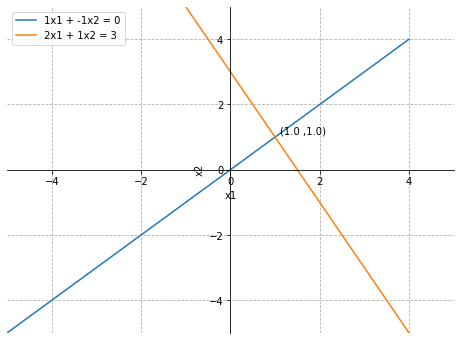

In [11]:
plot_([[ 1,-1,0],[2,1,3]])

In [12]:
from functools import reduce

In [13]:
def plot_colour(lines,signs,ub=-5,lb=5):
    #lines: [(a1,b1,c1), (a2,b2,c2)...] #ax + by = c
    #ub,lb: upper bound and lower bound for x axis
    # signs : 0 => greater than ; 1 = > less than
    X = np.array(range(ub,lb))
    
    fig, ax = plt.subplots(figsize=(8,6))
    
    d = np.linspace(-2,16,300)
    x,y = np.meshgrid(d,d)
    
    plt.axis([ub, lb, ub, lb])
 
    y_s = []
    for [a,b,c] in lines:
        Y, e = plot_lines(a,b,c,X) #y-line, e-equation
        
        ax.plot(X,Y,label=e)
        y_s.append(Y)
    
    list_ = []
    for i in range(len(signs)):
        a,b,c = lines[i]
        if signs[i]: # 1 => less than
            constraint = (b*y <= -a*x + c)
            print(f'{b}*y <= {-a}*x + {c}')
        else:
            constraint = (b*y >= -a*x + c)
            print(f'{b}*y >= {-a}*x + {c}')
                  
        list_.append(constraint)
   
    res = reduce(lambda x, y: x & y, list_) 
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    
    all_combinations = list(itertools.combinations(lines, 2))
    
    for i in all_combinations:
        a,b,c = intersect(i[0],i[1], verbose = False)
        if a != b and b != c and a != -1:
            ax.annotate(a, xy=b, xytext=c)
    
    plt.imshow(res.astype(int), extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(linestyle='dashdot')
    
    # Add a Legend
    plt.legend()
    plt.savefig('1.png')
    

1*y >= -1*x + -1
-0.5*y <= -1*x + 2
-2*y >= -1*x + -4
1*y <= -1*x + 4
1*y <= -1*x + 8


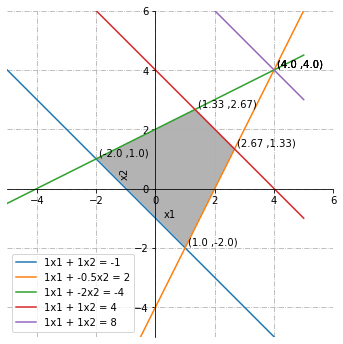

In [14]:
ax = plot_colour([[1,1,-1],[1,-0.5,2],[1,-2,-4],[1,1,4],[1,1,8]],[0,1,0,1,1],lb=6) # 0 : greater than

(-100.0, 100.0, -100.0, 100.0)

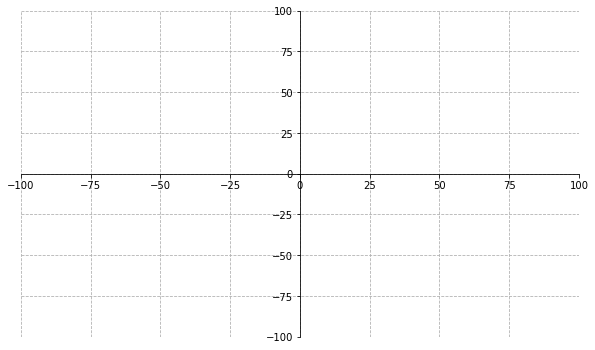

In [15]:
x = np.array(range(-100,100))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot([0,0],[1,1], linewidth=2, color='red' )

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
# plt.legend()
plt.grid(linestyle='--')
plt.axis([-100, 100, -100, 100])

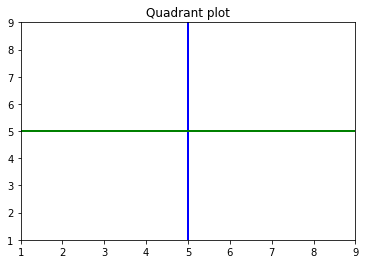

In [16]:
plt.figure()
# # Hold activation for multiple lines on same graph
# plt.hold('on')
# Set x-axis range
plt.xlim((1,9))
# Set y-axis range
plt.ylim((1,9))

plt.title('Quadrant plot')
# Draw some sub-regions in upper left quadrant
# points (5,9) and (5,1)
plt.plot([5,5],[9,1], linewidth=2, color='blue')

# points (1,5) and (9,5)
plt.plot([1,9],[5,5] ,linewidth=2, color='green')


plt.show()

## unique sol, m=n; m:eqn n:vars

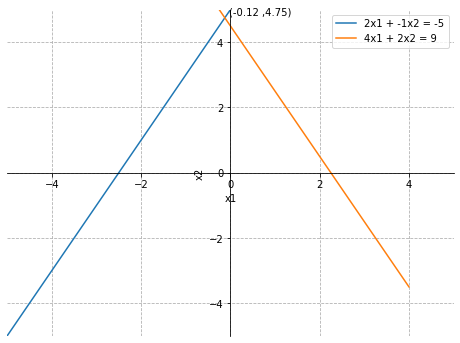

In [17]:
plot_([(2,-1,-5),(4,2,9)])

## inf sol m< n

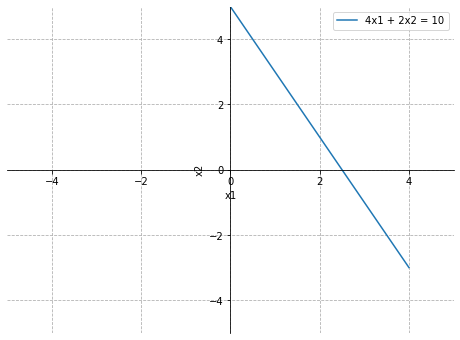

In [18]:
plot_([(4,2,10)])

## no sol m>n

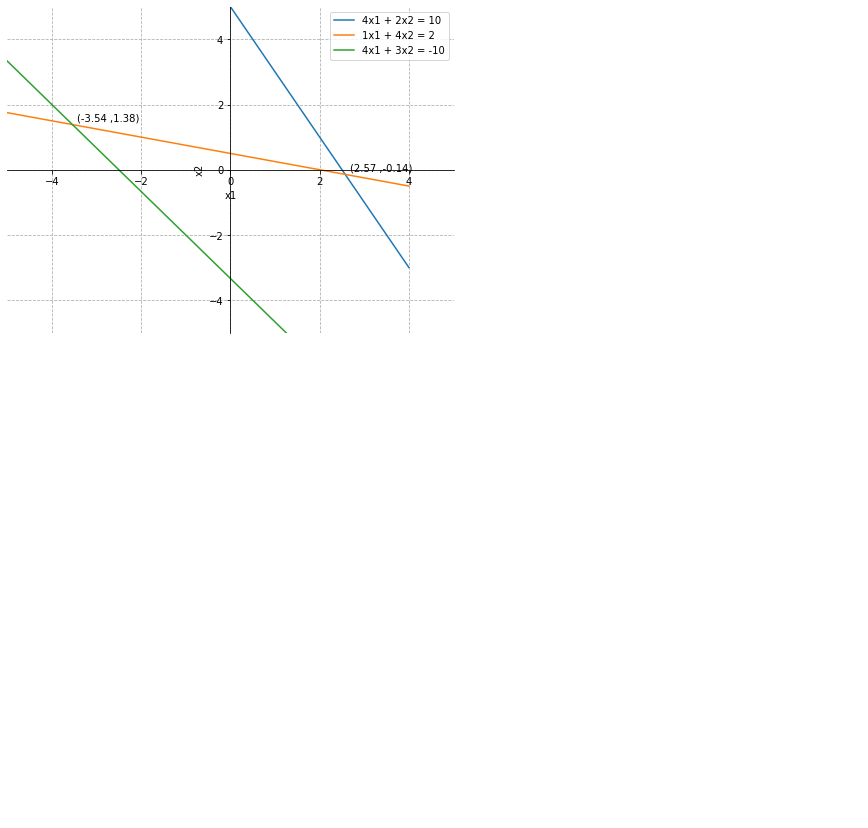

In [19]:
plot_([(4,2,10), (1,4,2), (4,3,-10)])

# 3D

In [20]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

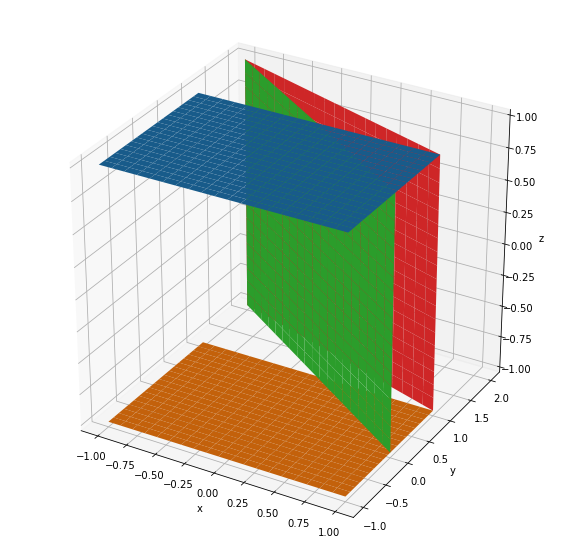

In [21]:
a,b,c,d = 0,0,1,1

x = np.linspace(-1,1,20)
y = np.linspace(-1,1,20)

X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z')

surf = ax.plot_surface(X, Y, Z)

a,b,c,d = 0,0,1,-1
Z = (d - a*X - b*Y) / c
surf = ax.plot_surface(X, Y, Z)

x = np.linspace(-1,1,20)
z = np.linspace(-1,1,20)

X, Z = np.meshgrid(x, z)
Y = 1 - X
surf = ax.plot_surface(X, Y, Z)

Y = (3 - X)/2
surf = ax.plot_surface(X, Y, Z, label='x+2y=3')

# Y = 1-X
# surf = ax.plot_surface(X, Y, Z)
# line.set_label('Label via method')
